# Take 2: Adaboost with Weak Classifiers
None of that bagging classifier bullshit

In [3]:
# Import guys
import pandas as pd
import numpy as np
from scipy import sparse
# from AdaBoostClassifier import AdaBoostClassifier
#%run AdaBoostWeak.py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Import data

In [4]:
# column names
with open('data/column_names.txt', 'r') as f:
    column_names = [line.strip() for line in f]

sparse_dat = sparse.load_npz("data/sparse_df.npz")

# Extract labels from the first column
labels = sparse_dat[:, 0]

# Create a list of column indices to keep
to_keep = list(set(range(sparse_dat.shape[1])) - set([0]))

# Extract the design matrix
X = sparse_dat[:, to_keep]

print(f'labels: \n{labels}')

labels: 
  (2, 0)	1
  (5, 0)	1
  (8, 0)	1
  (9, 0)	1
  (11, 0)	1
  (12, 0)	1
  (15, 0)	1
  (19, 0)	1
  (34, 0)	1
  (42, 0)	1
  (54, 0)	1
  (56, 0)	1
  (65, 0)	1
  (67, 0)	1
  (68, 0)	1
  (93, 0)	1
  (95, 0)	1
  (114, 0)	1
  (117, 0)	1
  (120, 0)	1
  (121, 0)	1
  (123, 0)	1
  (134, 0)	1
  (135, 0)	1
  (139, 0)	1
  :	:
  (15952, 0)	1
  (15953, 0)	1
  (15954, 0)	1
  (15955, 0)	1
  (15956, 0)	1
  (15957, 0)	1
  (15958, 0)	1
  (15959, 0)	1
  (15960, 0)	1
  (15961, 0)	1
  (15962, 0)	1
  (15963, 0)	1
  (15964, 0)	1
  (15965, 0)	1
  (15966, 0)	1
  (15967, 0)	1
  (15968, 0)	1
  (15969, 0)	1
  (15970, 0)	1
  (15971, 0)	1
  (15972, 0)	1
  (15973, 0)	1
  (15974, 0)	1
  (15975, 0)	1
  (15976, 0)	1


In [5]:
print(f'Design matrix: \n{X}')

Design matrix: 
  (17173, 0)	1
  (17240, 0)	2
  (17164, 1)	1
  (17363, 1)	1
  (17448, 1)	1
  (17910, 1)	1
  (17914, 1)	1
  (17933, 1)	2
  (15801, 2)	1
  (15867, 2)	1
  (16217, 2)	1
  (17173, 2)	3
  (17189, 2)	1
  (17386, 2)	1
  (17765, 2)	4
  (17933, 3)	2
  (17325, 4)	1
  (17366, 4)	1
  (16271, 5)	1
  (16837, 5)	1
  (17933, 6)	2
  (17933, 7)	2
  (17173, 8)	2
  (17933, 8)	1
  (15801, 9)	1
  :	:
  (8386, 56199)	2
  (8669, 56200)	1
  (10316, 56200)	1
  (8805, 56201)	1
  (9218, 56201)	1
  (9565, 56202)	1
  (9814, 56202)	1
  (6232, 56203)	1
  (9353, 56203)	1
  (5661, 56204)	9
  (6860, 56204)	1
  (8698, 56204)	1
  (125, 56205)	1
  (1228, 56205)	1
  (4422, 56205)	1
  (5648, 56206)	1
  (7464, 56206)	1
  (5648, 56207)	2
  (6025, 56208)	2
  (6025, 56209)	2
  (6151, 56210)	2
  (8669, 56211)	1
  (10316, 56211)	1
  (6340, 56212)	1
  (8696, 56212)	1


### Train and Test split
To do: consider stratifying by type

In [6]:
# To do - stratify the split 
n_samples = labels.shape[0]
# Use train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.dtype)
print("proportion of spam in training data:", (y_train == 1).sum().item() / y_train.shape[0])
print("proportion of spam in testing data:", (y_test == 1).sum().item() / y_test.shape[0])

(14524, 56213)
(14524, 1)
(3632, 56213)
(3632, 1)
int64
proportion of spam in training data: 0.39568989259157256
proportion of spam in testing data: 0.11921806167400881


In [7]:
def errors(y, y_pred):
        """
        Calculate the proportion of type 2 errors - when the true label is 1 - spam, and the predicted label is 0 - ham

        Args:
        y: true labels
        y_pred: predicted labels
        """
        n = y.shape[0]
        type2errors = ((y == 1) & (y_pred == 0)).sum().item()
        type1errors = ((y == 0) & (y_pred == 1)).sum().item()
        correct = (y_pred == y).sum().item()
        return type2errors, type1errors, correct

### Train/Test models

2 models:
1. Without penalty
2. With penalty

In [6]:
%run AdaBoostWeak.py

aboost1 = AdaBoostWeak(type2penalty = False, rounds = 200, maxDTdepth = 5)
aboost1.fit(X = X_train, y = y_train.toarray().ravel())



In [7]:
predictions = aboost1.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Model 1 Test Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# print(aboost1.alphas)
print(predictions)

Model 1 Test Accuracy:  0.6049008810572687
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 11 
 type 1 errors: 1424
[0 0 1 ... 0 0 0]


In [8]:
predictions = aboost1.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 1 (no penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 1 (no penalty) Training set Accuracy:  0.9825805563205728
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 126 
 type 1 errors: 127


In [9]:
%run AdaBoostWeak.py

aboost2 = AdaBoostWeak(type2penalty = True, rounds = 200, maxDTdepth = 5)
aboost2.fit(X = X_train, y = y_train.toarray().ravel())

In [10]:
predictions = aboost2.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 2 (with penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 2 (with penalty) Training set Accuracy:  0.9998622968879096
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 2 
 type 1 errors: 0


In [11]:
predictions = aboost2.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Model 2 Test Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# print(aboost1.alphas)
print(predictions)

Model 2 Test Accuracy:  0.7133810572687225
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 20 
 type 1 errors: 1021
[0 0 0 ... 0 0 0]


In [12]:
%run AdaBoostWeakClassic.py

aboost3 = AdaBoostWeakClassic(type2penalty = False, rounds = 200, maxDTdepth = 5)
aboost3.fit(X = X_train, y = y_train.toarray().ravel())

In [13]:
predictions = aboost3.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 3 (classic w/o penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 3 (classic w/o penalty) Training set Accuracy:  0.9948361332966125
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 3 
 type 1 errors: 72


In [14]:
predictions = aboost3.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Model 3 Test Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# print(aboost1.alphas)
print(predictions)

Model 3 Test Accuracy:  0.7334801762114538
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 23 
 type 1 errors: 945
[0 0 0 ... 0 1 0]


In [15]:
%run AdaBoostWeakClassic.py

aboost4 = AdaBoostWeakClassic(type2penalty = True, rounds = 200, maxDTdepth = 5)
aboost4.fit(X = X_train, y = y_train.toarray().ravel())

In [16]:
predictions = aboost4.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 4 (classic with penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 4 (classic with penalty) Training set Accuracy:  0.9948361332966125
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 0 
 type 1 errors: 75


In [17]:
predictions = aboost4.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Model 4 Test Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# print(aboost1.alphas)
print(predictions)

Model 4 Test Accuracy:  0.675385462555066
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 33 
 type 1 errors: 1146
[0 0 0 ... 0 0 0]


### Model tuning/Hyperparameter search

Sigh. So much overfitting

In [33]:
param_grid = \
{'maxDTdepth': [5], 'pen_factor': [0.1, 0.3, 0.5, 0.7, 1.2, 1.5, 1.7, 2]}

In [22]:
for rounds in param_grid['rounds']:
    for maxDTdepth in param_grid['maxDTdepth']:
        %run AdaBoostWeakClassic.py
        aboost = AdaBoostWeakClassic(type2penalty = False, rounds = rounds, maxDTdepth = maxDTdepth)
        aboost.fit(X = X_train, y = y_train.toarray().ravel())

        # training reports
        predictions = aboost.predict(X_train)
        type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
        print(f"Model without penalty | rounds: {rounds} | maxDTdepth: {maxDTdepth}")
        print("Training Accuracy: ", correct/len(predictions))
        print(f'type 2 errors: {type2} \ntype 1 errors: {type1}')

        # testing reports
        predictions = aboost.predict(X_test)
        type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
        print("Test Accuracy: ", correct/len(predictions))
        print(f'type 2 errors: {type2} \ntype 1 errors: {type1}\n')
        
        for pen_factor in param_grid['pen_factor']:
            %run AdaBoostWeakClassic.py
            aboost = AdaBoostWeakClassic(type2penalty = True, rounds = rounds, maxDTdepth = maxDTdepth, pen_factor=pen_factor)
            aboost.fit(X = X_train, y = y_train.toarray().ravel())

            # training reports
            predictions = aboost.predict(X_train)
            type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
            print(f"Model with penalty: {pen_factor} | rounds: {rounds} | maxDTdepth: {maxDTdepth}")
            print("Training Accuracy: ", correct/len(predictions))
            print(f'type 2 errors: {type2} \ntype 1 errors: {type1}')

            # testing reports
            predictions = aboost.predict(X_test)
            type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
            print("Test Accuracy: ", correct/len(predictions))
            print(f'type 2 errors: {type2} \ntype 1 errors: {type1}\n')


Model without penalty | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9949049848526577
type 2 errors: 0 
type 1 errors: 74
Test Accuracy:  0.6018722466960352
type 2 errors: 10 
type 1 errors: 1436

Model with penalty: 0.1 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9945607270724318
type 2 errors: 0 
type 1 errors: 79
Test Accuracy:  0.6775881057268722
type 2 errors: 22 
type 1 errors: 1149

Model with penalty: 0.3 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9927705866152575
type 2 errors: 0 
type 1 errors: 105
Test Accuracy:  0.7480726872246696
type 2 errors: 14 
type 1 errors: 901

Model with penalty: 0.5 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9939410630680253
type 2 errors: 0 
type 1 errors: 88
Test Accuracy:  0.7477973568281938
type 2 errors: 29 
type 1 errors: 887

Model with penalty: 0.7 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9927705866152575
type 2 errors: 0 
type 1 errors: 105
Test Accuracy:  0.6712555066079295
type 2 errors: 22 
typ

KeyboardInterrupt: 

In [13]:
print(X_test.shape[0])

3632


In [34]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, shuffle=True, random_state=42)
# 3 dim arrays: array[a][b][c], a - fold, b - depth, c - penalty factor (first element will be no penalty)
all_fold_val_accuracies = []
all_fold_errors = []

fold = 0
for train_index, test_index in kf.split(X_train):
    # each key will be a depth
    all_depth_val_accuracies = {}
    all_depth_errors = {}

    print(f"-------------------FOLD {fold}-------------------")
    
    for maxDTdepth in param_grid['maxDTdepth']:
        all_pen_val_accuracies = {}
        all_pen_errors = {}
        %run AdaBoostWeakClassic.py
        aboost = AdaBoostWeakClassic(type2penalty = False, rounds = 200, maxDTdepth = maxDTdepth)
        aboost.fit(X = X_train[train_index], y = y_train.toarray().ravel()[train_index])

        # training reports
        predictions = aboost.predict(X_train[train_index])
        type2, type1, correct = errors(y_train.toarray().ravel()[train_index], predictions)
        print(f"Model without penalty | rounds: 200 | maxDTdepth: {maxDTdepth}")
        print("Training Accuracy: ", correct/len(predictions))
        print(f'type 2 errors: {type2} \ntype 1 errors: {type1}')

        # testing reports
        predictions = aboost.predict(X_train[test_index])
        type2, type1, correct = errors(y_train.toarray().ravel()[test_index], predictions)
        print("Test Accuracy: ", correct/len(predictions))
        print(f'type 2 errors: {type2} \ntype 1 errors: {type1}\n')

        all_pen_val_accuracies['none'] = correct/len(predictions)
        all_pen_errors['none'] = (type2, type1)
        
        for pen_factor in param_grid['pen_factor']:
            %run AdaBoostWeakClassic.py
            aboost = AdaBoostWeakClassic(type2penalty = True, rounds = 200, maxDTdepth = maxDTdepth, pen_factor=pen_factor)
            aboost.fit(X = X_train[train_index], y = y_train.toarray().ravel()[train_index])
    
            # training reports
            predictions = aboost.predict(X_train[train_index])
            type2, type1, correct = errors(y_train.toarray().ravel()[train_index], predictions)
            print(f"Model with penalty, {pen_factor} | rounds: 200 | maxDTdepth: {maxDTdepth}")
            print("Training Accuracy: ", correct/len(predictions))
            print(f'type 2 errors: {type2} \ntype 1 errors: {type1}')
    
            # testing reports
            predictions = aboost.predict(X_train[test_index])
            type2, type1, correct = errors(y_train.toarray().ravel()[test_index], predictions)
            print("Test Accuracy: ", correct/len(predictions))
            print(f'type 2 errors: {type2} \ntype 1 errors: {type1}\n')

            all_pen_val_accuracies[pen_factor] = correct/len(predictions)
            all_pen_errors[pen_factor] = (type2, type1)

        all_depth_val_accuracies[maxDTdepth] = all_pen_val_accuracies
        all_depth_errors[maxDTdepth] = all_pen_errors

    all_fold_val_accuracies.append(all_depth_val_accuracies)
    all_fold_errors.append(all_depth_errors)
    fold += 1

-------------------FOLD 0-------------------
Model without penalty | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9985311668043698
type 2 errors: 0 
type 1 errors: 16
Test Accuracy:  0.9396860369044341
type 2 errors: 70 
type 1 errors: 149

Model with penalty, 0.1 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9985311668043698
type 2 errors: 0 
type 1 errors: 16
Test Accuracy:  0.9460203800605894
type 2 errors: 68 
type 1 errors: 128

Model with penalty, 0.3 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9985311668043698
type 2 errors: 0 
type 1 errors: 16
Test Accuracy:  0.947122004957312
type 2 errors: 75 
type 1 errors: 117

Model with penalty, 0.5 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9985311668043698
type 2 errors: 0 
type 1 errors: 16
Test Accuracy:  0.9490498485265767
type 2 errors: 61 
type 1 errors: 124

Model with penalty, 0.7 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9985311668043698
type 2 errors: 0 
type 1 errors: 16
Test Accuracy:  0

In [35]:
# for fold_accuracies, fold_errors in zip(all_fold_val_accuracies, all_fold_errors):
#     print(fold_accuracies)
#     print(fold_errors)

In [38]:
# Initialize variables to store the best models
best_model_acc = {'depth': 0, 'penalty_factor': 0, 'accuracy': 0}
best_model_type2 = {'depth': 0, 'penalty_factor': 0, 'type2_errors': float('inf'), 'accuracy': 0}

# Iterate over all folds
for fold_accuracies, fold_errors in zip(all_fold_val_accuracies, all_fold_errors):
    # Iterate over each depth
    for depth, depth_accuracies in fold_accuracies.items():
        # Iterate over each penalty factor
        for penalty_factor, accuracy in depth_accuracies.items():
            # Get the corresponding type 2 errors
            # print(fold_errors.items())
            # print(fold_accuracies.items())
            # print(depth_accuracies.items())
            type2_errors = fold_errors[depth][penalty_factor][0]
            
            # Update best model based on accuracy
            if accuracy > best_model_acc['accuracy']:
                best_model_acc = {
                    'depth': depth,
                    'penalty_factor': penalty_factor,
                    'type2_errors': type2_errors,
                    'accuracy': accuracy
                }
            
            # Update best model based on type 2 errors
            if type2_errors < best_model_type2['type2_errors']:
                best_model_type2 = {
                    'depth': depth,
                    'penalty_factor': penalty_factor,
                    'type2_errors': type2_errors,
                    'accuracy': accuracy
                }
            elif type2_errors == best_model_type2['type2_errors']:
                # Tiebreaker based on accuracy
                if accuracy > best_model_type2['accuracy']:
                    best_model_type2 = {
                        'depth': depth,
                        'penalty_factor': penalty_factor,
                        'type2_errors': type2_errors,
                        'accuracy': accuracy
                    }

# Output the best models
print("Best model based on validation accuracy:", best_model_acc)
print("Best model based on smallest number of type 2 errors:", best_model_type2)

Best model based on validation accuracy: {'depth': 5, 'penalty_factor': 1.5, 'type2_errors': 38, 'accuracy': 0.97521343982374}
Best model based on smallest number of type 2 errors: {'depth': 5, 'penalty_factor': 2, 'type2_errors': 21, 'accuracy': 0.9575874414761774}


In [42]:
# Initialize a dictionary to store the sum of accuracies and count for each model configuration
model_performance = {}

# Iterate through each fold's performance data
for fold_accuracies, fold_errors in zip(all_fold_val_accuracies, all_fold_errors):
    for depth, penalties in fold_accuracies.items():
        for penalty, accuracy in penalties.items():
            # Create a unique key for each model configuration
            type2_errors = fold_errors[depth][penalty][0]
            key = (depth, penalty)
            if key not in model_performance:
                model_performance[key] = {'total_accuracy': 0, 'type2errors': 0, 'count': 0}
            # Sum the accuracies and count the occurrences for each model configuration
            model_performance[key]['total_accuracy'] += accuracy
            model_performance[key]['type2errors'] += type2_errors
            model_performance[key]['count'] += 1

# Calculate the average accuracy for each model configuration
for key, value in model_performance.items():
    model_performance[key]['average_accuracy'] = value['total_accuracy'] / value['count']
    model_performance[key]['type2errors'] = value['type2errors'] / value['count']

# Find the best model configuration based on the highest average accuracy
best_model_key = max(model_performance, key=lambda k: model_performance[k]['average_accuracy'])
best_model_depth, best_model_penalty = best_model_key
best_model_average_accuracy = model_performance[best_model_key]['average_accuracy']

print("Best Model based on validation accuracy across folds:")
print(f"Best model depth: {best_model_depth}")
print(f"Best model penalty factor: {best_model_penalty}")
print(f"Best model average accuracy across folds: {best_model_average_accuracy}")
print(f"Best model average type 2 errors across folds: {model_performance[best_model_key]['type2errors']}")

best_model_key = min(model_performance, key=lambda k: model_performance[k]['type2errors'])
best_model_depth, best_model_penalty = best_model_key
best_model_average_accuracy = model_performance[best_model_key]['average_accuracy']

print("Best Model based on smallest average number of type 2 errors across folds:")
print(f"Best model depth: {best_model_depth}")
print(f"Best model penalty factor: {best_model_penalty}")
print(f"Best model average accuracy across folds: {best_model_average_accuracy}")
print(f"Best model average type 2 errors across folds: {model_performance[best_model_key]['type2errors']}")


Best Model based on validation accuracy across folds:
Best model depth: 5
Best model penalty factor: 1.5
Best model average accuracy across folds: 0.969843018452217
Best model average type 2 errors across folds: 43.75
Best Model based on smallest average number of type 2 errors across folds:
Best model depth: 5
Best model penalty factor: 2
Best model average accuracy across folds: 0.9571743321399063
Best model average type 2 errors across folds: 30.5


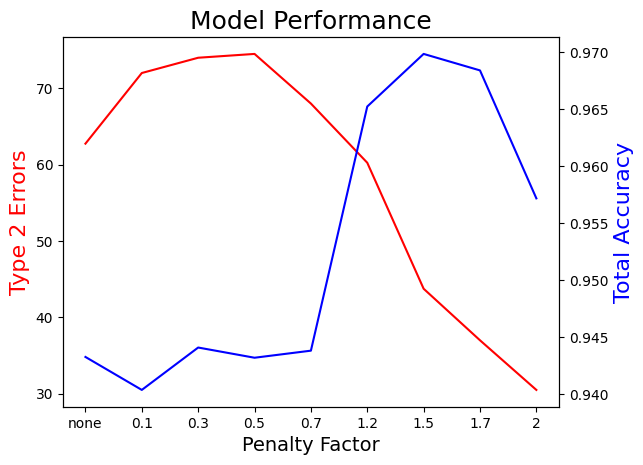

In [49]:
import matplotlib.pyplot as plt

# Extract penalty factors, type 2 errors, and total accuracy
penalties = [pen for (_, pen) in model_performance.keys()]
type2errors = [model_performance[(depth, pen)]['type2errors'] for depth, pen in model_performance]
total_accuracy = [model_performance[(depth, pen)]['average_accuracy'] for depth, pen in model_performance]

# Plotting

fig,ax = plt.subplots()
ax.plot(penalties, type2errors, color='red', label='Type 2 Errors')
ax.set_ylabel('Type 2 Errors', color='red', fontsize=16)

ax.set_xlabel('Penalty Factor', fontsize=14)

ax2 = ax.twinx()

ax2.plot(penalties, total_accuracy, color='blue', label='Total Accuracy')
ax2.set_ylabel('Total Accuracy', color='blue', fontsize=16)

# plt.figure(figsize=(10, 5))
# plt.plot(penalties, type2errors, color='red', label='Type 2 Errors')
# plt.plot(penalties, total_accuracy, color='blue', label='Total Accuracy')

# Labeling the axes

plt.title('Model Performance', fontsize=18)
plt.show()